# Network Generator
This is a notebook to help creating new networks by visualizing them. Use the `run all` button

In [62]:
import random

from cyberwheel.network.network_generation.network_generator import NetworkYAMLGenerator
from cyberwheel.network.network_base import Network

In [63]:
name = "100-host-network"
network = NetworkYAMLGenerator(network_name=name)

## Add router

In [64]:
network.router("core_router")

## Add Subnets

In [65]:
network.subnet("user_subnet1", "core_router", ip_range="192.168.0.0/24")
network.subnet("server_subnet1", "core_router", ip_range="192.168.1.0/24")
network.subnet("user_subnet2", "core_router", ip_range="192.168.2.0/24")
network.subnet("subnet3", "core_router", ip_range="192.168.3.0/24")
network.subnet("dmz_subnet", "core_router", ip_range="192.168.4.0/24")
network.subnet("server_subnet2", "core_router", ip_range="192.168.1.0/24")
network.subnet("dmz_subnet2", "core_router", ip_range="192.168.4.0/24")

## Add Hosts to Subnets

First, specify some host types to randomly pick from. Seed the RNG to get the same network each time.

In [66]:
server_types = ["mail_server", "file_server", "web_server", "ssh_jump_server", "proxy_server"]
all_types = ["mail_server", "file_server", "web_server", "ssh_jump_server", "proxy_server", "workstation", "workstation", "workstation", "workstation", "workstation"]
random.seed(10)

Use for loops to create multiple hosts on a subnet at one time

In [67]:
for i in range(0,10):
    network.host(f"host{i}", "user_subnet1", "workstation")
for i in range(0,10):
    network.host(f"server{i}", "server_subnet1", random.choice(server_types))
for i in range(10,20):
    network.host(f"host{i}", "user_subnet2", "workstation")

for i in range(0, 35):
    network.host(f"server_or_host{i}", "subnet3", random.choice(all_types))
for i in range(0, 10):
    network.host(f"dmz{i}", "dmz_subnet", "workstation")

for i in range(10,20):
    network.host(f"server{i}", "server_subnet2", random.choice(server_types[:2]))
for i in range(10, 25):
    network.host(f"dmz{i}", "dmz_subnet2", "workstation")

## Add Interfaces between Hosts

In [68]:
network.interface("host6", "server_or_host4")
network.interface("host4", "dmz2")
network.interface("dmz1", "server9")
network.interface("host19", "dmz4")
network.interface("dmz5", "dmz19")
network.interface("dmz18", "server19")


## Create the YAML file in the CWD

In [69]:
network.output()

## Visualize the New Network

In [70]:
cyberwheel_network=Network.create_network_from_yaml(name + ".yaml")

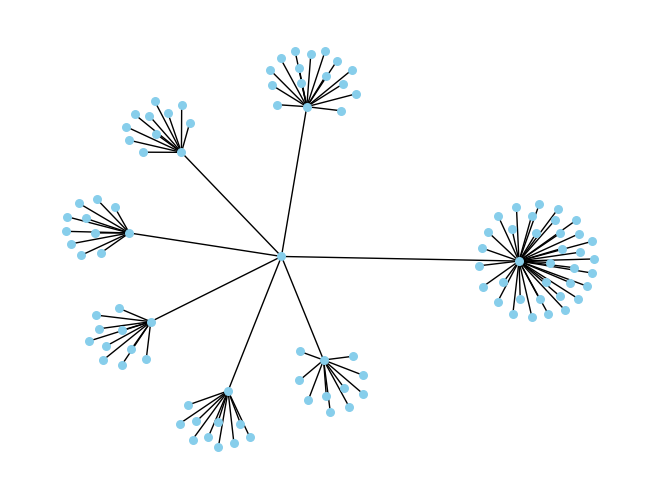

In [71]:
cyberwheel_network.draw(filename="")